In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

In [15]:
data=pd.read_csv('/content/dataset_Facebook.csv', delimiter=';')

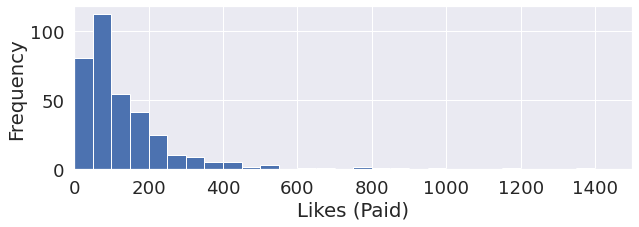

sample_size: 359
sample_mean: 155.84679665738162
sample_variance: 48403.2362397099


In [19]:
unpaid_likes = data[data['Paid']==0]['like']
unpaid_likes = unpaid_likes.dropna()
sns.set(font_scale=1.65)
fig = plt.figure(figsize=(10,3))
ax=unpaid_likes.hist(range=(0, 1500),bins=30)
ax.set_xlim(0,1500)

plt.xlabel('Likes (Paid)')
plt.ylabel('Frequency')
plt.show()

print('sample_size: {}'.format(unpaid_likes.shape[0]))
print('sample_mean: {}'.format(unpaid_likes.mean()))
print('sample_variance: {}'.format(unpaid_likes.var()))

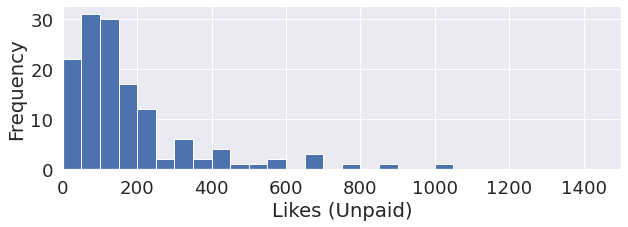

sample_size: 139
sample_mean: 235.6474820143885
sample_variance: 247175.0704827443


In [20]:
paid_likes = data[data['Paid']==1]['like']
fig = plt.figure(figsize=(10,3))
ax=paid_likes.hist(range=(0, 1500),bins=30)
ax.set_xlim(0,1500)

plt.xlabel('Likes (Unpaid)')
plt.ylabel('Frequency')
plt.show()

print('sample_size: {}'.format(paid_likes.shape[0]))
print('sample_mean: {}'.format(paid_likes.mean()))
print('sample_variance: {}'.format(paid_likes.var()))

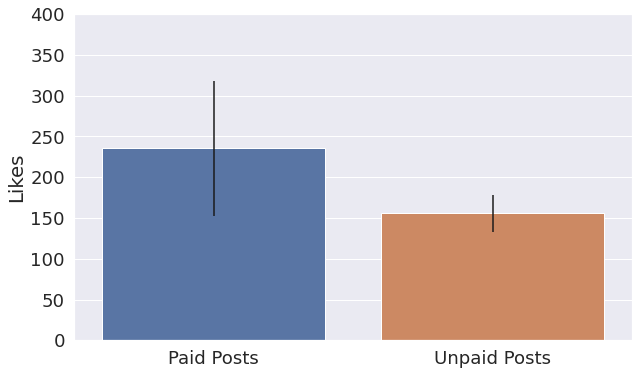

In [23]:
paid_err = 1.96*(paid_likes.std())/(np.sqrt(paid_likes.shape[0]))
unpaid_err = 1.96*(unpaid_likes.std())/(np.sqrt(unpaid_likes.shape[0]))

x = ['Paid Posts', 'Unpaid Posts']
y = [paid_likes.mean(), unpaid_likes.mean()]
fig = plt.figure(figsize=(10, 6))
ax = sns.barplot(x=x, y=y, yerr=[paid_err, unpaid_err])
ax.set_ylim(0, 400)
plt.ylabel('Likes')
plt.show()

In [25]:
df_num = (paid_likes.var()/paid_likes.shape[0] + unpaid_likes.var()/unpaid_likes.shape[0])**2
df_dem = (
    (paid_likes.var()/paid_likes.shape[0])**2/(paid_likes.shape[0]-1)) + \
    (unpaid_likes.var()/unpaid_likes.shape[0])**2/(unpaid_likes.shape[0]-1)
df = df_num/df_dem
print('degrees of freedom: {}'.format(df))

degrees of freedom: 159.36680150833664


In [32]:
t_score = stats.ttest_ind_from_stats(paid_likes.mean(), paid_likes.std(), paid_likes.shape[0], \
                               unpaid_likes.mean(), unpaid_likes.std(), unpaid_likes.shape[0], \
                               equal_var=False)
t_score

Ttest_indResult(statistic=1.824490721115131, pvalue=0.06995072279510875)

In [26]:
df_num = (paid_likes.var()/paid_likes.shape[0] + unpaid_likes.var()/unpaid_likes.shape[0])**2
df_dem = (
    (paid_likes.var()/paid_likes.shape[0])**2/(paid_likes.shape[0]-1)) + \
    (unpaid_likes.var()/unpaid_likes.shape[0])**2/(unpaid_likes.shape[0]-1)
df = df_num/df_dem
print('degrees of freedom: {}'.format(df))

degrees of freedom: 159.36680150833664


In [24]:
s_welch = np.sqrt(paid_likes.var()/paid_likes.shape[0] + unpaid_likes.var()/unpaid_likes.shape[0])
t=(paid_likes.mean()-unpaid_likes.mean())/s_welch
print('t-value: {}'.format(t))

t-value: 1.824490721115131


In [34]:
mean_c= -1.08
std_c= 10.25
n_c= 3081
mean_r= -1.53
std_r= 8.56
n_r= 202430

In [39]:
t_score = stats.ttest_ind_from_stats(mean_c, std_c, n_c, \
                               mean_r, std_r, n_r, \
                               equal_var=False)
t_score

Ttest_indResult(statistic=2.424050400103354, pvalue=0.015404496806268417)

In [37]:
sq= np.sqrt(std_c**2/n_c+ std_r**2/n_r)
t=(mean_c-mean_r)/sq
print('t-value: {}'.format(t))

t-value: 2.424050400103354


In [38]:
df_num = (std_c**2/n_c+ std_r**2/n_r)**2
df_dem = (
    (std_c**2/n_c)**2/(n_c-1)) + \
    (std_r**2/n_r)**2/(n_r-1)
df = df_num/df_dem
print('degrees of freedom: {}'.format(df))

degrees of freedom: 3145.7295421035983


We only need a t-score of 1.658 and degrees of freedom of at least 120 to get a p-value of 0.05.